#Task 1: Baseline Classifier Development

In [1]:
#Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
#Import data
df = pd.read_csv('training_data.csv')
df

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_1451,tcp_segment_data_byte_1452,tcp_segment_data_byte_1453,tcp_segment_data_byte_1454,tcp_segment_data_byte_1455,tcp_segment_data_byte_1456,tcp_segment_data_byte_1457,tcp_segment_data_byte_1458,tcp_segment_data_byte_1459,Label
0,0.000000,0.156863,0.388235,0.278431,0.25098,0,0.501961,0.733333,0.207843,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,0.000000,0.156863,0.027451,0.164706,0.25098,0,0.501961,0.090196,0.325490,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,0.000000,0.203922,0.980392,0.078431,0.25098,0,0.243137,0.796078,0.764706,0.411765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web Attack
3,0.000000,0.156863,0.356863,0.658824,0.25098,0,0.494118,0.164706,0.235294,0.807843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
4,0.000000,0.156863,0.254902,0.929412,0.25098,0,0.501961,0.862745,0.560784,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.007843,0.105882,0.403922,0.972549,0.25098,0,0.501961,0.325490,0.235294,0.196078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infiltration
44996,0.000000,0.203922,0.419608,0.298039,0.25098,0,0.243137,0.352941,0.549020,0.258824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Web Attack
44997,0.000000,0.203922,0.388235,0.282353,0.25098,0,0.243137,0.384314,0.564706,0.701961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DoS
44998,0.003922,0.611765,0.427451,0.933333,0.25098,0,0.501961,0.301961,0.772549,0.929412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Infiltration


##Exploring the Data

In [3]:
#View basic info
print("Data shape:", df.shape)
print("\nData types:")
print(df.dtypes)
df.info()

Data shape: (45000, 1526)

Data types:
ip_header_byte_2              float64
ip_header_byte_3              float64
ip_header_byte_4              float64
ip_header_byte_5              float64
ip_header_byte_6              float64
                               ...   
tcp_segment_data_byte_1456    float64
tcp_segment_data_byte_1457    float64
tcp_segment_data_byte_1458    float64
tcp_segment_data_byte_1459    float64
Label                          object
Length: 1526, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Columns: 1526 entries, ip_header_byte_2 to Label
dtypes: float64(1518), int64(7), object(1)
memory usage: 523.9+ MB


In [4]:
#Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
ip_header_byte_2              0
ip_header_byte_3              0
ip_header_byte_4              0
ip_header_byte_5              0
ip_header_byte_6              0
                             ..
tcp_segment_data_byte_1456    0
tcp_segment_data_byte_1457    0
tcp_segment_data_byte_1458    0
tcp_segment_data_byte_1459    0
Label                         0
Length: 1526, dtype: int64


In [5]:
#Drop rows with any missing values
df = df.dropna()

In [6]:
#Look at class distribution
print("\nClass Distribution:")
print(df.iloc[:, -1].value_counts())


Class Distribution:
Label
Benign          22494
Brute Force      3760
Port Scan        3759
DoS              3752
Web Attack       3748
Infiltration     3744
DDoS             3743
Name: count, dtype: int64


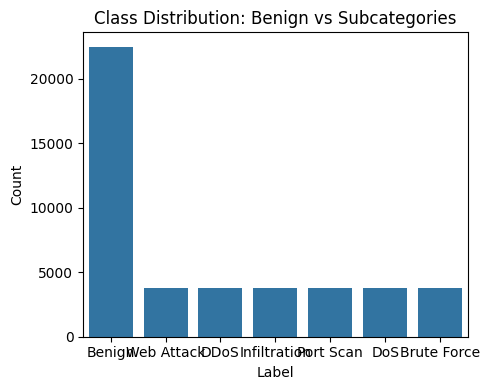

In [7]:
#Visualize imbalance
plt.figure(figsize=(5, 4))
sns.countplot(x=df.columns[-1], data=df)
plt.title("Class Distribution: Benign vs Subcategories")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [8]:
#Checking data balance
y = df.iloc[:, -1]
print(y.value_counts(normalize=True))

Label
Benign          0.499867
Brute Force     0.083556
Port Scan       0.083533
DoS             0.083378
Web Attack      0.083289
Infiltration    0.083200
DDoS            0.083178
Name: proportion, dtype: float64


In [9]:
#Check for normalization of features
X = df.iloc[:, :-1]
print("Feature Summary Statistics:\n")
print(X.describe())

Feature Summary Statistics:

       ip_header_byte_2  ip_header_byte_3  ip_header_byte_4  ip_header_byte_5  \
count      45000.000000      45000.000000      45000.000000      45000.000000   
mean           0.000814          0.220807          0.327346          0.500165   
std            0.003352          0.140455          0.235439          0.289751   
min            0.000000          0.003922          0.000000          0.000000   
25%            0.000000          0.156863          0.145098          0.250980   
50%            0.000000          0.156863          0.290196          0.498039   
75%            0.000000          0.203922          0.447059          0.749020   
max            0.356863          0.996078          1.000000          1.000000   

       ip_header_byte_6  ip_header_byte_7  ip_header_byte_8  \
count      45000.000000           45000.0      45000.000000   
mean           0.240991               0.0          0.409877   
std            0.049064               0.0          0

In [10]:
#Let's look at all the labels to convert into binary for next step in preprocessing
label_col = df.columns[-1]
print("Values in label column:")
print(df[label_col].unique())

Values in label column:
['Benign' 'Web Attack' 'DDoS' 'Infiltration' 'Port Scan' 'DoS'
 'Brute Force']


##Preprocessing the data set

In [11]:
#Do not need to do  one-hot encoding or label encoding since there are no categorical features
#Do not need to normalize as it has already been done
#Do not need to oversample the data set, it is already balanced

In [12]:
#Grab the label column
label_col = df.columns[-1]

In [13]:
#Clean up strings and convert to lowercase
df[label_col] = df[label_col].str.strip()

In [14]:
#Define the malicious labels
malicious = ['Web Attack', 'DDoS', 'Infiltration', 'Port Scan', 'DoS', 'Brute Force']

In [15]:
#Convert to binary: 1 for malicious, 0 for benign
df['Label'] = df[label_col].apply(lambda x: 1 if x in malicious else 0)

In [16]:
#Print class distribution
print("Binary Class Distribution (0 = Benign, 1 = Malicious):")
print(df['Label'].value_counts())

Binary Class Distribution (0 = Benign, 1 = Malicious):
Label
1    22506
0    22494
Name: count, dtype: int64


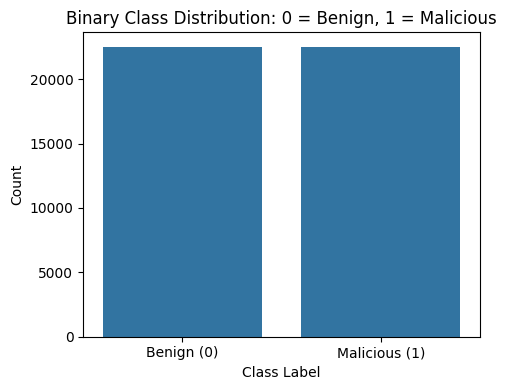

In [17]:
#Plot new binary distribution
plt.figure(figsize=(5, 4))
sns.countplot(x='Label', data=df)
plt.title("Binary Class Distribution: 0 = Benign, 1 = Malicious")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.xticks([0, 1], ['Benign (0)', 'Malicious (1)'])
plt.tight_layout()
plt.show()

In [18]:
df

,ip_header_byte_2,ip_header_byte_3,ip_header_byte_4,ip_header_byte_5,ip_header_byte_6,ip_header_byte_7,ip_header_byte_8,ip_header_byte_10,ip_header_byte_11,tcp_header_byte_4,...,tcp_segment_data_byte_1451,tcp_segment_data_byte_1452,tcp_segment_data_byte_1453,tcp_segment_data_byte_1454,tcp_segment_data_byte_1455,tcp_segment_data_byte_1456,tcp_segment_data_byte_1457,tcp_segment_data_byte_1458,tcp_segment_data_byte_1459,Label
0,0.000000,0.156863,0.388235,0.278431,0.25098,0,0.501961,0.733333,0.207843,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.156863,0.027451,0.164706,0.25098,0,0.501961,0.090196,0.325490,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000000,0.203922,0.980392,0.078431,0.25098,0,0.243137,0.796078,0.764706,0.411765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.000000,0.156863,0.356863,0.658824,0.25098,0,0.494118,0.164706,0.235294,0.807843,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.000000,0.156863,0.254902,0.929412,0.25098,0,0.501961,0.862745,0.560784,0.858824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.007843,0.105882,0.403922,0.972549,0.25098,0,0.501961,0.325490,0.235294,0.196078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
44996,0.000000,0.203922,0.419608,0.298039,0.25098,0,0.243137,0.352941,0.549020,0.258824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
44997,0.000000,0.203922,0.388235,0.282353,0.25098,0,0.243137,0.384314,0.564706,0.701961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
44998,0.003922,0.611765,0.427451,0.933333,0.25098,0,0.501961,0.301961,0.772549,0.929412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


##Build the Neural Network Architecture

In [19]:
#Separate features
X = df.iloc[:, :-1]
y = df['Label']

In [20]:
#Split the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [21]:
#Standardizing for faster convergence
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [22]:
#Apply the same standardization fit to the X_test as well
X_test = scaler.transform(X_test)

In [23]:
#Train the baseline neural network model
model_NN = MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                     activation='relu',
                      solver='adam',
                      learning_rate='adaptive',
                      max_iter=300,
                      random_state=0)
#model_NN = MLPClassifier(max_iter=1000)
model_NN.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 64, 32), learning_rate='adaptive',
              max_iter=300, random_state=0)

In [24]:
#Predict on data set
y_hat_NN = model_NN.predict(X_test)

In [25]:
#Confusion matrix
confusion_matrix(y_test, y_hat_NN)

array([[4473,   26],
       [   3, 4498]])

In [26]:
#Accuracy, Precision, Recall
print("Accuracy:", accuracy_score(y_test, y_hat_NN))
print("Precision:", precision_score(y_test, y_hat_NN))
print("Recall:", recall_score(y_test, y_hat_NN))

Accuracy: 0.9967777777777778
Precision: 0.9942528735632183
Recall: 0.999333481448567


In [27]:
#Classification Report
print(classification_report(y_test, y_hat_NN))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4499
           1       0.99      1.00      1.00      4501

    accuracy                           1.00      9000
   macro avg       1.00      1.00      1.00      9000
weighted avg       1.00      1.00      1.00      9000



In [28]:
#False Positive Rate
fp_rate = confusion_matrix(y_test, y_hat_NN)
fp_rate = fp_rate[0, 1] / (fp_rate[0, 1] + fp_rate[0, 0])
print("False Positive Rate:", fp_rate)

False Positive Rate: 0.00577906201378084


In [29]:
#Summary of all the metrics together
print("Accuracy:", round(accuracy_score(y_test, y_hat_NN), 4))
print("Precision:", round(precision_score(y_test, y_hat_NN), 4))
print("Recall:", round(recall_score(y_test, y_hat_NN), 4))
print("False Positive Rate:", round(fp_rate, 4))

Accuracy: 0.9968
Precision: 0.9943
Recall: 0.9993
False Positive Rate: 0.0058


#Task 2: Defense Mechanism Implementation

##Adversarial Training

In [30]:
#Noise Generator
def simulate_noise(X, epsilon=0.1):
    noise = epsilon * np.sign(np.random.randn(*X.shape))
    return np.clip(X + noise, -3, 3)

In [31]:
#Extract & Split
X = df.iloc[:, :-1]
y = df['Label']

In [32]:
#Training
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [33]:
#Scale for faster convergece
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [34]:
#Perturb malicious training samples
X_train_mal = X_train_scaled[y_train == 1]
y_train_mal = y_train[y_train == 1]
X_train_adv = simulate_noise(X_train_mal, epsilon=0.01)
y_train_adv = y_train_mal

In [35]:
#Augment the data
X_train_aug = np.vstack((X_train_scaled, X_train_adv))
y_train_aug = np.hstack((y_train, y_train_adv))

In [36]:
#Train new model
model_NN2 = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=300, random_state=42)
model_NN2.fit(X_train_aug, y_train_aug)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

In [37]:
#Prepare validation splits
X_val_benign = X_val_scaled[y_val == 0]
X_val_mal = X_val_scaled[y_val == 1]

In [38]:
#Evaluate Metrics
from sklearn.metrics import precision_score, recall_score

def evaluate_metrics(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)
    fpr = cm[0, 1] / (cm[0, 1] + cm[0, 0]) if cm[0, 1] + cm[0, 0] > 0 else 0
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | FPR: {fpr:.4f}")

In [39]:
#Evaluate on clean subsets
evaluate_metrics("Newly trained MLP on Clean Benign", np.zeros(len(X_val_benign)), model_NN2.predict(X_val_benign))
evaluate_metrics("Newly trained MLP on Clean Malicious", np.ones(len(X_val_mal)), model_NN2.predict(X_val_mal))

Accuracy: 0.9964 | Precision: 0.0000 | Recall: 0.0000 | FPR: 0.0036
Accuracy: 0.9978 | Precision: 1.0000 | Recall: 0.9978 | FPR: 0.0000


In [40]:
 #Evaluate on perturbed malicious sample
for eps in [0.01, 0.05, 0.1]:
    X_val_adv = simulate_noise(X_val_mal, epsilon=eps)
    y_pred_adv = model_NN2.predict(X_val_adv)
    evaluate_metrics(f"Defended MLP on Adversarial Samples (ε={eps})", np.ones(len(X_val_adv)), y_pred_adv)

Accuracy: 0.9989 | Precision: 1.0000 | Recall: 0.9989 | FPR: 0.0000
Accuracy: 0.9942 | Precision: 1.0000 | Recall: 0.9942 | FPR: 0.0000
Accuracy: 0.9687 | Precision: 1.0000 | Recall: 0.9687 | FPR: 0.0000


In [41]:
#Confusion Matrixes
#Clean Benign
y_pred_benign = model_NN2.predict(X_val_benign)
print("Confusion Matrix - Clean Benign:")
print(confusion_matrix(np.zeros(len(X_val_benign)), y_pred_benign))

#Clean Malicious
y_pred_mal = model_NN2.predict(X_val_mal)
print("Confusion Matrix - Clean Malicious:")
print(confusion_matrix(np.ones(len(X_val_mal)), y_pred_mal))

#Perturbed Malicious Samples
for eps in [0.01, 0.05, 0.1]:
    X_val_adv = simulate_noise(X_val_mal, epsilon=eps)
    y_pred_adv = model_NN2.predict(X_val_adv)
    print(f"Confusion Matrix - Perturbed Malicious (ε={eps}):")
    print(confusion_matrix(np.ones(len(X_val_adv)), y_pred_adv))

Confusion Matrix - Clean Benign:
[[4483   16]
 [   0    0]]
Confusion Matrix - Clean Malicious:
[[   0    0]
 [  10 4491]]
Confusion Matrix - Perturbed Malicious (ε=0.01):
[[   0    0]
 [   7 4494]]
Confusion Matrix - Perturbed Malicious (ε=0.05):
[[   0    0]
 [  32 4469]]
Confusion Matrix - Perturbed Malicious (ε=0.1):
[[   0    0]
 [ 141 4360]]


##Ensemble Method

In [42]:
#Use the features (excluding original + binary labels) and binary label column
X = df.iloc[:, :-1]
y = df['Label']

In [43]:
#Split the dataset into training and test sets (with stratification to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [44]:
#Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
#Already trained my Neural Network

In [46]:
#Train a Random Forest classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=1)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [47]:
#Get Predictions and Evaluate MLP
y_pred_mlp = model_NN.predict(X_test_scaled)
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
fpr_mlp = cm_mlp[0, 1] / (cm_mlp[0, 0] + cm_mlp[0, 1])

In [48]:
#Get Predictions and Evaluate Random Forest
y_pred_rf = model_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
fpr_rf = cm_rf[0, 1] / (cm_rf[0, 0] + cm_rf[0, 1])

In [49]:
#Ensemble with Soft Voting
#Get predicted probabilities from both models for class 1
probs_mlp = model_NN.predict_proba(X_test_scaled)[:, 1]
probs_rf = model_rf.predict_proba(X_test)[:, 1]

#Average the probabilities and threshold at 0.5
ensemble_probs = (probs_mlp + probs_rf) / 2
y_pred_ensemble = (ensemble_probs > 0.5).astype(int)
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
fpr_ensemble = cm_ensemble[0, 1] / (cm_ensemble[0, 0] + cm_ensemble[0, 1])

In [50]:
#Print Evaluation Metrics
#Baseline MLP
print("Accuracy:", round(accuracy_score(y_test, y_pred_mlp), 4))
print("Precision:", round(precision_score(y_test, y_pred_mlp), 4))
print("Recall:", round(recall_score(y_test, y_pred_mlp), 4))
print("False Positive Rate:", round(fpr_mlp, 4))

Accuracy: 0.9987
Precision: 0.9976
Recall: 0.9998
False Positive Rate: 0.0024


In [51]:
#Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_mlp

array([[4488,   11],
       [   1, 4500]])

In [52]:
#Print Evaluation Metrics
#Random Forest
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("Precision:", round(precision_score(y_test, y_pred_rf), 4))
print("Recall:", round(recall_score(y_test, y_pred_rf), 4))
print("False Positive Rate:", round(fpr_rf, 4))

Accuracy: 0.9989
Precision: 0.998
Recall: 0.9998
False Positive Rate: 0.002


In [53]:
#Confusion Matrix RF
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[4490,    9],
       [   1, 4500]])

In [54]:
#Print Evaluation Metrics
#MLP, RF, & Soft Voting
print("Accuracy:", round(accuracy_score(y_test, y_pred_ensemble), 4))
print("Precision:", round(precision_score(y_test, y_pred_ensemble), 4))
print("Recall:", round(recall_score(y_test, y_pred_ensemble), 4))
print("False Positive Rate:", round(fpr_ensemble, 4))

Accuracy: 0.9988
Precision: 0.9978
Recall: 0.9998
False Positive Rate: 0.0022


In [55]:
#Confusion Matrix Ensemble
cm_ensemble = confusion_matrix(y_test, y_pred_ensemble)
cm_ensemble

array([[4489,   10],
       [   1, 4500]])

In [56]:
#Evaluate ensemble on perturbed malicious samples (from the adversarial training method)
ensemble_adv_results = []

for eps in [0.01, 0.05, 0.1]:

    #Generate perturbed malicious samples
    X_val_adv = simulate_noise(X_val_mal, epsilon=eps)

    #Convert perturbed data to DataFrame with original column names (for RandomForest)
    X_val_adv_df = pd.DataFrame(X_val_adv, columns=X.columns)

    #Predict probabilities
    probs_mlp_adv = model_NN.predict_proba(X_val_adv)[:, 1]
    probs_rf_adv = model_rf.predict_proba(X_val_adv_df)[:, 1]

    #Soft voting: average probabilities, then apply threshold
    ensemble_probs_adv = (probs_mlp_adv + probs_rf_adv) / 2
    y_pred_ensemble_adv = (ensemble_probs_adv > 0.5).astype(int)

    #Ground truth: all malicious (1s)
    y_true_adv = np.ones(len(X_val_adv))

    #Compute evaluation metrics
    acc = accuracy_score(y_true_adv, y_pred_ensemble_adv)
    prec = precision_score(y_true_adv, y_pred_ensemble_adv, zero_division=0)
    rec = recall_score(y_true_adv, y_pred_ensemble_adv, zero_division=0)

    #CM
    cm = confusion_matrix(y_true_adv, y_pred_ensemble_adv)
    if cm.shape[0] > 1:
        fpr = cm[0, 1] / (cm[0, 1] + cm[0, 0]) if (cm[0, 1] + cm[0, 0]) > 0 else 0
    else:
        fpr = "N/A"  #No benign samples to calculate FPR

    #Print results
    print(f"\nEnsemble on Adversarial Samples (ε={eps})")
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | FPR: {fpr}")

    ensemble_adv_results.append({
        "Epsilon": eps,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "FPR": fpr
    })


Ensemble on Adversarial Samples (ε=0.01)
Accuracy: 0.9993 | Precision: 1.0000 | Recall: 0.9993 | FPR: 0

Ensemble on Adversarial Samples (ε=0.05)
Accuracy: 0.9993 | Precision: 1.0000 | Recall: 0.9993 | FPR: 0

Ensemble on Adversarial Samples (ε=0.1)
Accuracy: 0.9898 | Precision: 1.0000 | Recall: 0.9898 | FPR: 0


#For Professor Shah

In [ ]:
#Adversarial Training Method for Task 2

prof_df = pd.read_csv("training_data_adv.csv") #rename to dataset

#Split the features and  labels
X_prof = prof_df.drop("Label", axis=1)
y_prof_test = prof_df["Label"]

#If needed, drop any missing values
#prof_df = prof_df.dropna()

#Convert the string labels to binary: 0 = Benign, 1 = Malicious
y_prof = y_prof_test.apply(lambda x: 0 if x.strip() == "Benign" else 1)

#Scale features using existing StandardScaler
X_prof_scaled = scaler.transform(X_prof)

#Predict using the adversarially trained model
y_prof_pred = model_NN2.predict(X_prof_scaled)

#Evaluate using metrics function
evaluate_metrics("Instructor Test", y_prof, y_prof_pred)

Accuracy: 0.9988 | Precision: 0.9980 | Recall: 0.9996 | FPR: 0.0020


In [ ]:
#Ensemble Method for Task 2

#Load the data file
prof_df = pd.read_csv("training_data_adv.csv")

#Clean the data file
prof_df = prof_df.dropna()

#Split features and labels
X_prof = prof_df.drop("Label", axis=1)
y_prof_raw = prof_df["Label"]

#Convert labels to binary
y_prof = y_prof_raw.apply(lambda x: 0 if x.strip() == "Benign" else 1)

#Scale features for the MLP
X_prof_scaled = scaler.transform(X_prof)

#Predict on both models
probs_mlp_prof = model_NN.predict_proba(X_prof_scaled)[:, 1]
probs_rf_prof = model_rf.predict_proba(X_prof)[:, 1]

#Add the Soft voting: average probabilities, threshold at 0.5
ensemble_probs_prof = (probs_mlp_prof + probs_rf_prof) / 2
y_prof_ensemble_pred = (ensemble_probs_prof > 0.5).astype(int)

#Evaluate the ensemble model
evaluate_metrics("Ensemble (MLP + RF)", y_prof, y_prof_ensemble_pred)

Accuracy: 0.9987 | Precision: 0.9976 | Recall: 0.9998 | FPR: 0.0024


#Visualizations for the Report

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


ROC AUC Score: 0.9156399958340741


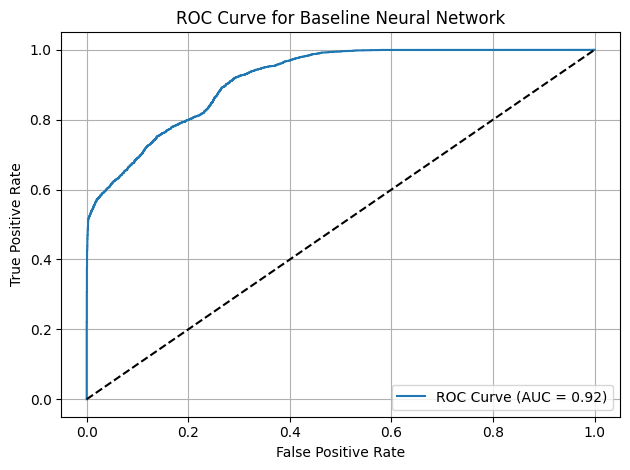

In [ ]:
#Get predicted probabilities for the positive class (malicious = 1)
y_probs = model_NN.predict_proba(X_test)[:, 1]

#Compute ROC AUC
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)

#Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Baseline Neural Network')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

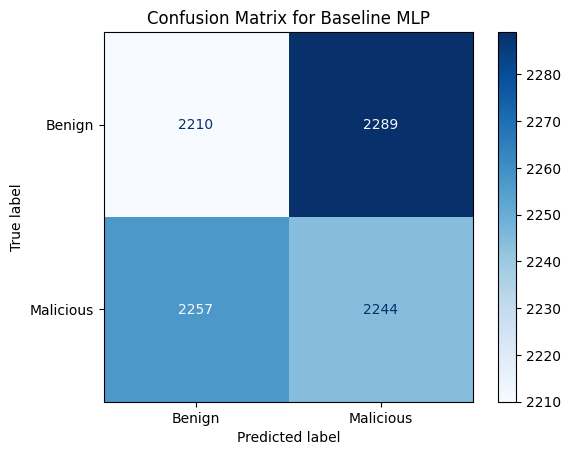

In [ ]:
#Confusion Matrix for Baseline MLP
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_hat_NN,
    display_labels=["Benign", "Malicious"],
    cmap="Blues"
)
plt.title("Confusion Matrix for Baseline MLP")
plt.show()

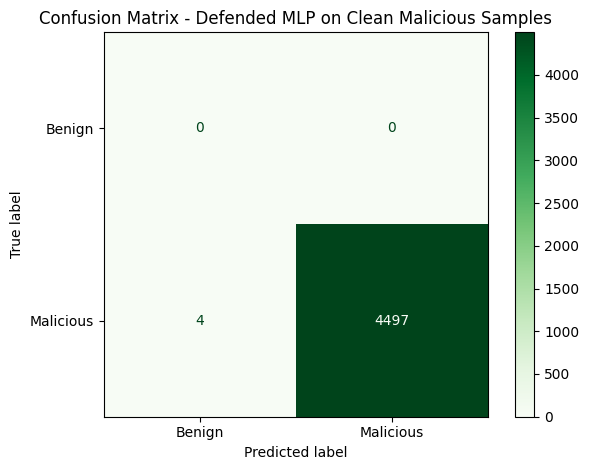

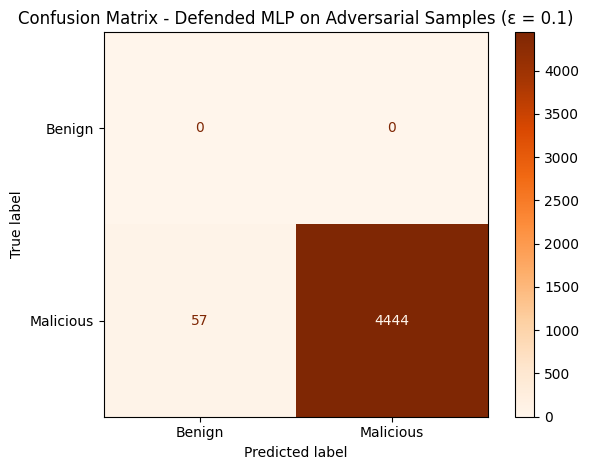

In [ ]:
#Adversarial Training
ConfusionMatrixDisplay.from_predictions(
    np.ones(len(X_val_mal)),
    model_NN2.predict(X_val_mal),
    display_labels=["Benign", "Malicious"],
    cmap="Greens"
)
plt.title("Confusion Matrix - Defended MLP on Clean Malicious Samples")
plt.tight_layout()
plt.show()

ConfusionMatrixDisplay.from_predictions(
    np.ones(len(X_val_adv)),
    model_NN2.predict(X_val_adv),
    display_labels=["Benign", "Malicious"],
    cmap="Oranges"
)
plt.title("Confusion Matrix - Defended MLP on Adversarial Samples (ε = 0.1)")
plt.tight_layout()
plt.show()

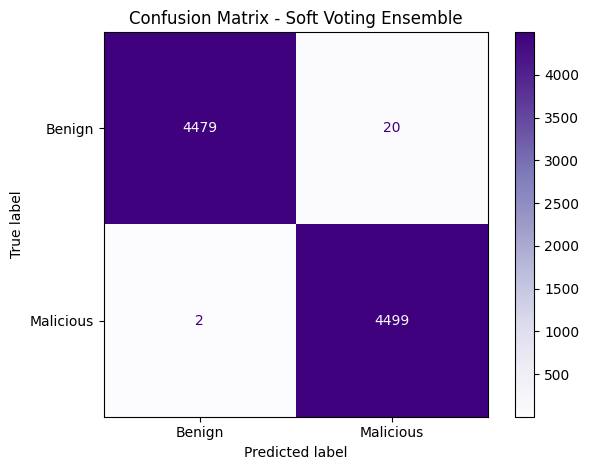

In [ ]:
#Ensemble Method
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_ensemble,
    display_labels=["Benign", "Malicious"],
    cmap="Purples"
)
plt.title("Confusion Matrix - Soft Voting Ensemble")
plt.tight_layout()
plt.show()

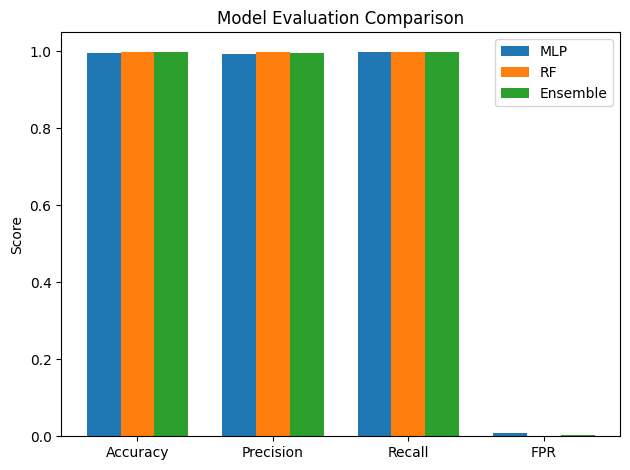

In [ ]:
#Model Evaluation
import matplotlib.pyplot as plt

labels = ['Accuracy', 'Precision', 'Recall', 'FPR']
mlp_scores = [accuracy_score(y_test, y_pred_mlp),
              precision_score(y_test, y_pred_mlp),
              recall_score(y_test, y_pred_mlp),
              fpr_mlp]

rf_scores = [accuracy_score(y_test, y_pred_rf),
             precision_score(y_test, y_pred_rf),
             recall_score(y_test, y_pred_rf),
             fpr_rf]

ensemble_scores = [accuracy_score(y_test, y_pred_ensemble),
                   precision_score(y_test, y_pred_ensemble),
                   recall_score(y_test, y_pred_ensemble),
                   fpr_ensemble]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots()
ax.bar(x - width, mlp_scores, width, label='MLP')
ax.bar(x, rf_scores, width, label='RF')
ax.bar(x + width, ensemble_scores, width, label='Ensemble')

ax.set_ylabel('Score')
ax.set_title('Model Evaluation Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()

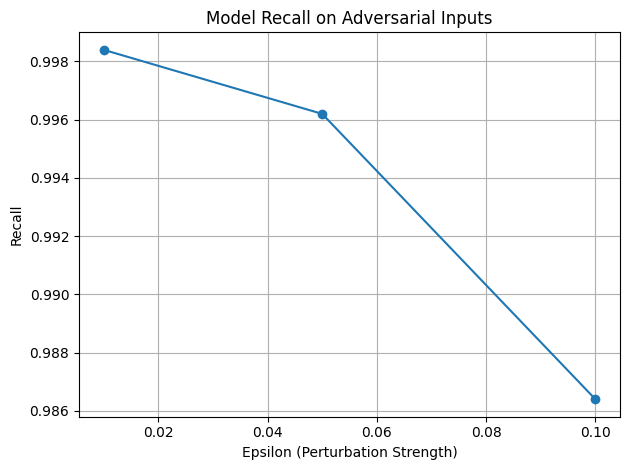

In [ ]:
#Recall on Epsilon for Adversarial Training
epsilons = [0.01, 0.05, 0.1]
recalls = [0.9984, 0.9962, 0.9864]

plt.plot(epsilons, recalls, marker='o')
plt.title("Model Recall on Adversarial Inputs")
plt.xlabel("Epsilon (Perturbation Strength)")
plt.ylabel("Recall")
plt.grid(True)
plt.tight_layout()
plt.show()